<a href="https://colab.research.google.com/github/arjunjanamatti/finance_and_trading/blob/master/lstm_futures_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#for deep learning model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Strategy#1
* Here only the nextprice is predicted

Train size:  (196000, 5)
Test size: (4000, 5)
X_train size:  (195988, 12, 5)
y_train size: (195988, 1)
Epoch 1/30
307/307 [==============================] - 20s 65ms/step - loss: 0.0150
Epoch 2/30
307/307 [==============================] - 20s 66ms/step - loss: 0.0042
Epoch 3/30
307/307 [==============================] - 20s 67ms/step - loss: 0.0035
Epoch 4/30
307/307 [==============================] - 21s 67ms/step - loss: 0.0028
Epoch 5/30
307/307 [==============================] - 20s 65ms/step - loss: 0.0022
Epoch 6/30
307/307 [==============================] - 20s 65ms/step - loss: 0.0017
Epoch 7/30
307/307 [==============================] - 20s 66ms/step - loss: 0.0013
Epoch 8/30
307/307 [==============================] - 20s 65ms/step - loss: 9.8559e-04
Epoch 9/30
307/307 [==============================] - 20s 65ms/step - loss: 7.8318e-04
Epoch 10/30
307/307 [==============================] - 20s 64ms/step - loss: 6.6394e-04
Epoch 11/30
307/307 [==============================] -

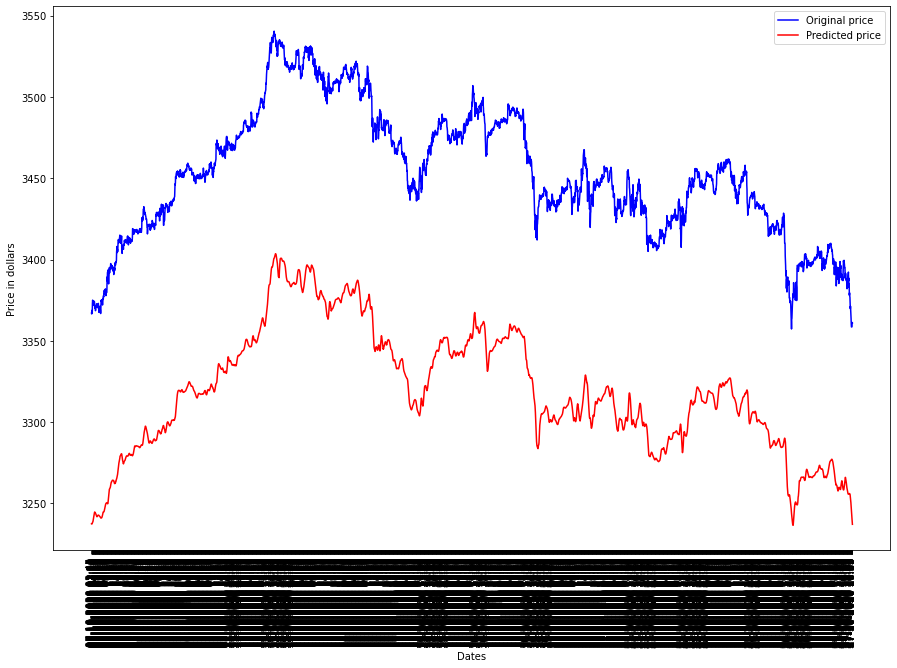

In [2]:
# load the dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lstm_stocks/excel_data.txt', delimiter  = '\t')
df = df.set_index('Date Time')
df.columns = ['open', 'high', 'low', 'last', 'volume', 'num_of_trades']
df = df.drop(labels = 'num_of_trades', axis = 1)

# reverse such that latest dates are in the last
df = df[::-1]

# split to training and testing data
train_set = df[:int(len(df)*0.98)].values
test_set = df[int(len(df)*0.98):].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

# scaling the data
scaler = MinMaxScaler()
train_set = scaler.fit_transform(train_set)

# arrange data for X_train and y_train
# number_of_values is the number of time frame used as X_train for y_train
number_of_values = 12
X_train, y_train = [], []
column = 0
for i in range(number_of_values, len(train_set)):
  X_train.append(train_set[i-number_of_values:i])
  #here we will predict the open price, hence column = 0
  y_train.append(train_set[i, column])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train = np.reshape(y_train, (-1,1))
print("X_train size: ",X_train.shape)
print("y_train size:",y_train.shape)

# neural LSTM network

lstm_model = Sequential()

# first layer
lstm_model.add(LSTM(units = 50, 
                    activation = 'relu', 
                    return_sequences = True, 
                    input_shape = (X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(rate = 0.2))

# second layer
lstm_model.add(LSTM(units = 60, 
                    activation = 'relu', 
                    return_sequences = True))
lstm_model.add(Dropout(rate = 0.3))

# third layer
lstm_model.add(LSTM(units = 80, 
                    activation = 'relu', 
                    return_sequences = True))
lstm_model.add(Dropout(rate = 0.4))

# final layer
lstm_model.add(LSTM(units = 120, 
                    activation = 'relu'))
lstm_model.add(Dropout(rate = 0.5))

# output layer
lstm_model.add(Dense(units = 1))

# compile the model
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# fit the model
lstm_model.fit(X_train, y_train, epochs = 30, batch_size = 640)

# test dataset reshaping
past_days = train_set[-12:]
test_set_transform = scaler.transform(test_set)
test_set_days = np.concatenate([past_days, test_set_transform], axis = 0)
X_test, y_test = [], []
column = 0
for i in range(number_of_values, len(test_set_days)):
  X_test.append(test_set_days[i-number_of_values:i])
  #here we will predict the open price, hence column = 0
  y_test.append(test_set_days[i, column])
X_test, y_test = np.array(X_test), np.array(y_test)
y_test = np.reshape(y_test, (-1,1))
print("X_test size: ",X_test.shape)
print("y_test size:",y_test.shape)

# inverse transform of scaled data
scale = MinMaxScaler()
scale.min_, scale.scale_ = scaler.min_[0], scaler.scale_[0]
y_pred = lstm_model.predict(X_test)
y_pred = scale.inverse_transform(y_pred)
y_test = scale.inverse_transform(y_test)

# Plots
plt.figure(figsize = (15,10))
plt.plot(df.index[int(len(df)*0.98):], y_test, color = 'b', label = 'Original price')
plt.plot(df.index[int(len(df)*0.98):], y_pred, color = 'r', label = 'Predicted price')
plt.xlabel('Dates')
plt.ylabel('Price in dollars')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [3]:
# load the dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lstm_stocks/excel_data.txt', delimiter  = '\t')
df = df.set_index('Date Time')
df.columns = ['open', 'high', 'low', 'last', 'volume', 'num_of_trades']
df = df.drop(labels = 'num_of_trades', axis = 1)

# reverse such that latest dates are in the last
df = df[::-1]

# split to training and testing data
train_set = df[:int(len(df)*0.98)].values
test_set = df[int(len(df)*0.98):].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (196000, 5)
Test size: (4000, 5)


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,200000.0,2899.858709,240.892093,2154.0,2729.25,2855.00,3036.00,3576.00
high,200000.0,2901.110180,240.712434,2154.0,2730.25,2856.25,3038.25,3576.50
low,200000.0,2898.598380,241.059727,2154.0,2728.25,2854.00,3033.25,3574.00
last,200000.0,2899.863014,240.887965,2154.0,2729.25,2855.00,3036.00,3576.25
volume,200000.0,5593.234860,9926.527561,1.0,628.00,1583.00,6357.00,246397.00


In [5]:
# import plotly.graph_objects as go

# fig = go.Figure(data = [go.Candlestick(
#                                     x = df.index,
#                                     open = df['open'],
#                                     close = df['last'],
#                                     high = df['high'],
#                                     low = df['low'])] )
# fig.show()

In [6]:
# arrange data for X_train and y_train
# number_of_values is the number of time frame used as X_train for y_train
number_of_values = 30
# future_time_predict = 6
X_train, y_train = [], []
column = 0
train_set_series = train_set[:,0]
for i in range(number_of_values, len(train_set_series) - number_of_values):
  X_train.append(train_set_series[i-number_of_values:i])
  #here we will predict the open price, hence column = 0
  y_train.append(train_set_series[i:i+int(number_of_values * 0.1)])
X_train, y_train = np.array(X_train), np.array(y_train)
# y_train = np.reshape(y_train, (-1,1))
print("X_train size: ",X_train.shape)
print("y_train size:",y_train.shape)

# normalizing the dataset
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

# reshape the inputdata
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))
print("after transformation, X_train size: ",X_train.shape)


X_train size:  (195940, 30)
y_train size: (195940, 3)
after transformation, X_train size:  (195940, 30, 1)


In [7]:
# multistep prediction model

# neural LSTM network

lstm_model_multi_step = Sequential()

# first layer
lstm_model_multi_step.add(LSTM(units = 50, 
                    activation = 'selu', 
                    return_sequences = True, 
                    input_shape = (X_train.shape[1], X_train.shape[2])))
lstm_model_multi_step.add(Dropout(rate = 0.2))

# second layer
lstm_model_multi_step.add(LSTM(units = 50, 
                    activation = 'selu', 
                    return_sequences = True))
lstm_model_multi_step.add(Dropout(rate = 0.3))

# third layer
lstm_model_multi_step.add(LSTM(units = 50, 
                    activation = 'selu', 
                    return_sequences = True))
lstm_model_multi_step.add(Dropout(rate = 0.4))

# final layer
lstm_model_multi_step.add(LSTM(units = 50, 
                    activation = 'relu'))
lstm_model_multi_step.add(Dropout(rate = 0.5))

# output layer
lstm_model_multi_step.add(Dense(units = (number_of_values * 0.1)))

# compile the model
lstm_model_multi_step.compile(optimizer = 'adam', loss = 'mean_squared_error')
# fit the model
lstm_model_multi_step.fit(X_train, y_train, epochs = 50, batch_size = 640)


Epoch 1/50
307/307 [==============================] - 45s 148ms/step - loss: 0.0229
Epoch 2/50
307/307 [==============================] - 46s 149ms/step - loss: 0.0078
Epoch 3/50
307/307 [==============================] - 45s 147ms/step - loss: 0.0040
Epoch 4/50
307/307 [==============================] - 45s 148ms/step - loss: 0.0025
Epoch 5/50
307/307 [==============================] - 45s 148ms/step - loss: 0.0019
Epoch 6/50
307/307 [==============================] - 45s 145ms/step - loss: 0.0016
Epoch 7/50
307/307 [==============================] - 45s 147ms/step - loss: 0.0015
Epoch 8/50
307/307 [==============================] - 45s 148ms/step - loss: 0.0015
Epoch 9/50
307/307 [==============================] - 45s 145ms/step - loss: 0.0014
Epoch 10/50
307/307 [==============================] - 45s 148ms/step - loss: 0.0014
Epoch 11/50
307/307 [==============================] - 45s 147ms/step - loss: 0.0014
Epoch 12/50
307/307 [==============================] - 45s 148ms/step - lo

In [8]:
# arrange data for X_test and y_test
# number_of_values is the number of time frame used as X_test for y_test
number_of_values = 30
X_test, y_test = [], []
test_set_series = test_set[:,0]
past_days = train_set[-number_of_values:,0]
test_set_days = np.concatenate([past_days, test_set_series], axis = 0)
for i in range(number_of_values, len(test_set_days) - number_of_values):
  X_test.append(test_set_days[i-number_of_values:i])
  #here we will predict the open price, hence column = 0
  y_test.append(test_set_days[i:i+int(number_of_values * 0.1)])
X_test, y_test = np.array(X_test), np.array(y_test)
# y_train = np.reshape(y_train, (-1,1))
print("X_test size: ",X_test.shape)
print("y_test size:",y_test.shape)

# normalizing the dataset
x_scaler = MinMaxScaler()
X_test = x_scaler.fit_transform(X_test)
y_scaler = MinMaxScaler()
y_test = y_scaler.fit_transform(y_test)

# reshape the inputdata
X_test = np.reshape(X_test, newshape = (X_test.shape[0], X_test.shape[1], 1))
print("after transformation, X_test size: ",X_test.shape)


X_test size:  (3970, 30)
y_test size: (3970, 3)
after transformation, X_test size:  (3970, 30, 1)


In [9]:
# inverse transform of scaled data
y_pred = lstm_model_multi_step.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)
y_test = y_scaler.inverse_transform(y_test)


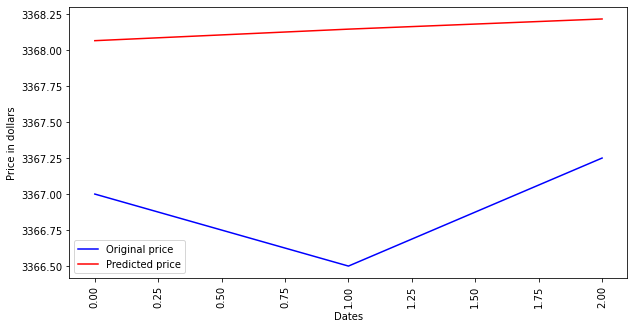

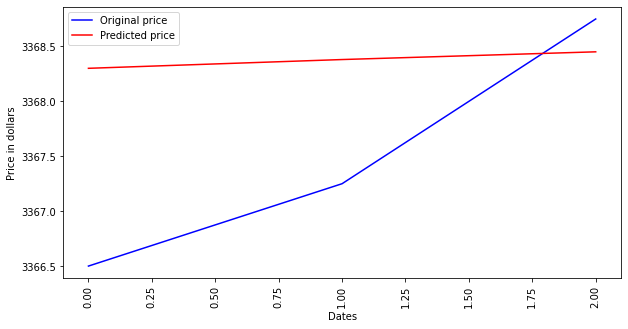

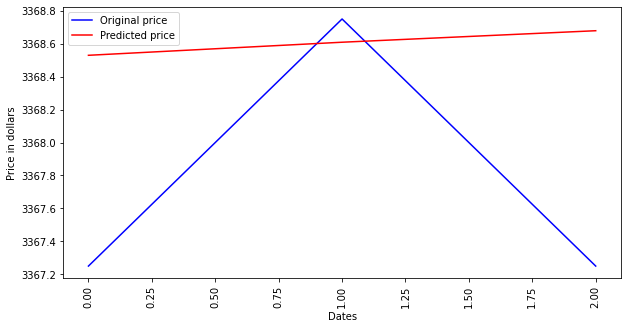

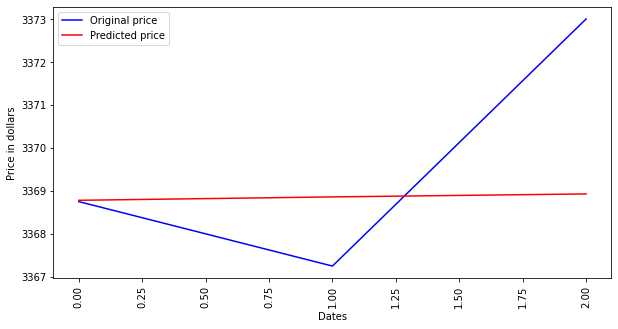

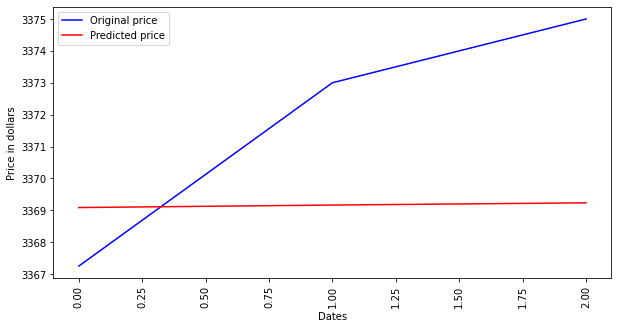

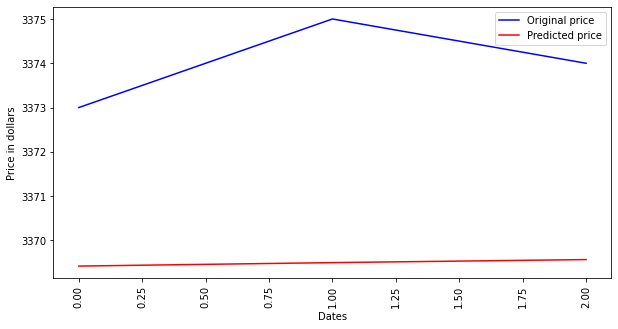

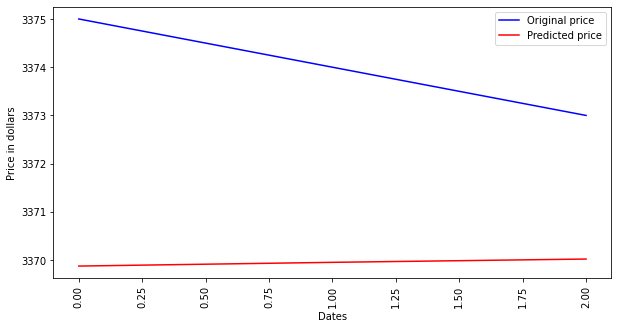

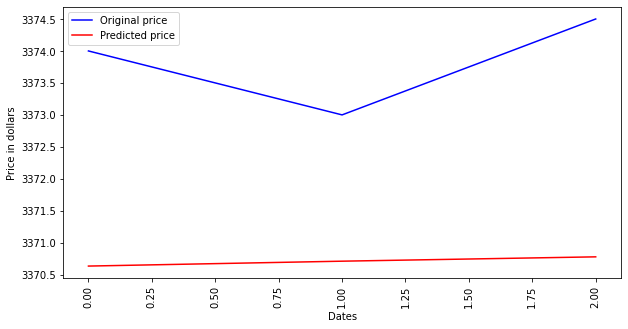

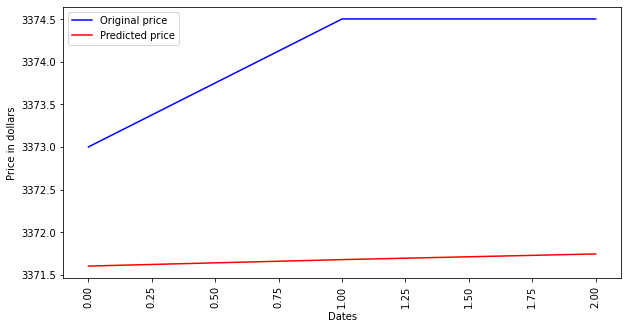

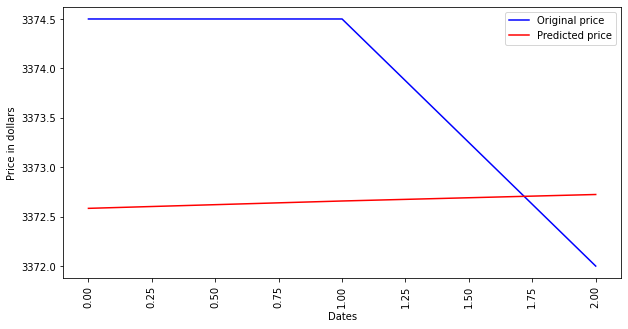

In [10]:
# Plots
for i in range(10):
  plt.figure(figsize = (10,5))
  plt.plot(y_test[i], color = 'b', label = 'Original price')
  plt.plot(y_pred[i], color = 'r', label = 'Predicted price')
  plt.xlabel('Dates')
  plt.ylabel('Price in dollars')
  plt.xticks(rotation = 90)
  plt.legend()
  plt.show()

In [11]:
for i in range(10):
  print(y_pred[i])

[3368.065  3368.145  3368.2156]
[3368.3008 3368.3806 3368.451 ]
[3368.5295 3368.609  3368.6787]
[3368.7805 3368.8594 3368.929 ]
[3369.0852 3369.1638 3369.2332]
[3369.4204 3369.4983 3369.5671]
[3369.877  3369.9543 3370.0227]
[3370.6357 3370.7122 3370.78  ]
[3371.603  3371.6787 3371.7454]
[3372.584  3372.6584 3372.724 ]
